# A tour of machine learning classifiers with Scikit-learn

In [13]:
import numpy as np
%matplotlib inline
from matplotlib import pylab as plt
from matplotlib import rcParams, rcParamsDefault
rcParams['figure.dpi'] = rcParamsDefault['figure.dpi'] * 2




from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [19]:
def plot_decision_region(X, y, classifier=None, resolution=0.02, test_idx=None):
    # set up lists of markers and colors 
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    
    # plot decision surface
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    if classifier:
        Z = classifier.predict(np.vstack([xx.ravel(), yy.ravel()]).T)
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    for i, y_val in enumerate(np.unique(y)):
        plt.scatter(X[y == y_val, 0], X[y == y_val, 1],
                   alpha=0.8, c=colors[i], label=y_val, marker=markers[i])

    # highlight test data
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', 
                    alpha=1.0, linewidth=1, marker='o',
                    s=55, label='test set')

    plt.legend(loc='best')
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])

In [15]:
# load data
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [16]:
# split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
test_idx=range(105, 150)

In [17]:
# standardize/scale features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack([X_train_std, X_test_std])
y_combined = np.hstack([y_train, y_test])

# Perceptron

Accuracy is 0.911


/Users/langechuanliu/.virtualenvs/cv/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


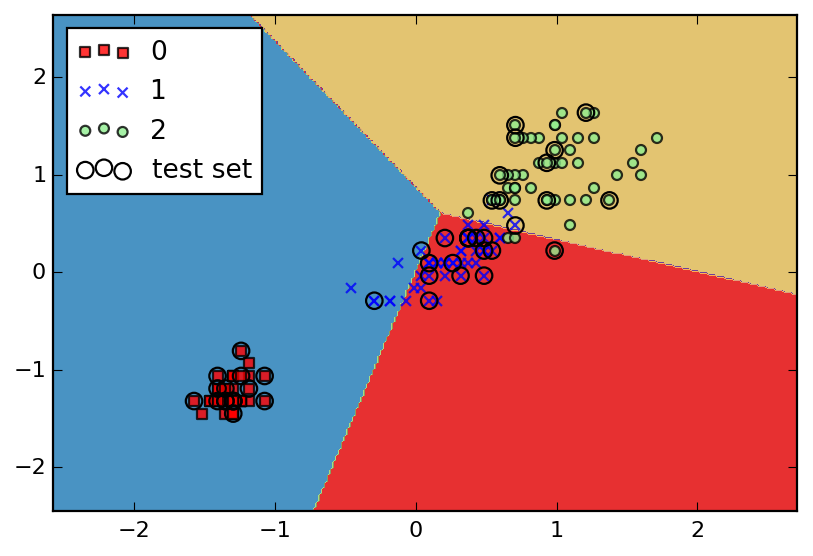

In [28]:
ppn = Perceptron(n_iter=300, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy is {:.3f}'.format(accuracy))
plot_decision_region(X_combined_std, y_combined, classifier=ppn, test_idx=test_idx)
plt.legend(loc='upper left')

# Logistic Regression

In [21]:
for c in range(-5, 6):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights = lr.coef_[1]
    y_pred = np.argmax(lr.predict_proba(X_test_std), axis=1)
    y_pred2 = lr.predict(X_test_std)
    accuracy = accuracy_score(y_pred, y_test)
    print('Accuracy is {:.3f}, weight for pedal length {:.2e}, weight for pedal width {:.2e}'.format(
        accuracy, weights[0], weights[1]))

Accuracy is 0.600, weight for pedal length 6.56e-05, weight for pedal width 3.27e-05
Accuracy is 0.600, weight for pedal length 6.54e-04, weight for pedal width 3.25e-04
Accuracy is 0.600, weight for pedal length 6.32e-03, weight for pedal width 3.03e-03
Accuracy is 0.600, weight for pedal length 4.88e-02, weight for pedal width 1.62e-02
Accuracy is 0.600, weight for pedal length 2.39e-01, weight for pedal width -6.65e-02
Accuracy is 0.800, weight for pedal length 1.06e+00, weight for pedal width -8.42e-01
Accuracy is 0.956, weight for pedal length 2.19e+00, weight for pedal width -1.98e+00
Accuracy is 0.978, weight for pedal length 2.51e+00, weight for pedal width -2.30e+00
Accuracy is 0.978, weight for pedal length 2.54e+00, weight for pedal width -2.34e+00
Accuracy is 0.978, weight for pedal length 2.55e+00, weight for pedal width -2.35e+00
Accuracy is 0.978, weight for pedal length 2.55e+00, weight for pedal width -2.35e+00


## with regularization

/Users/langechuanliu/.virtualenvs/cv/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


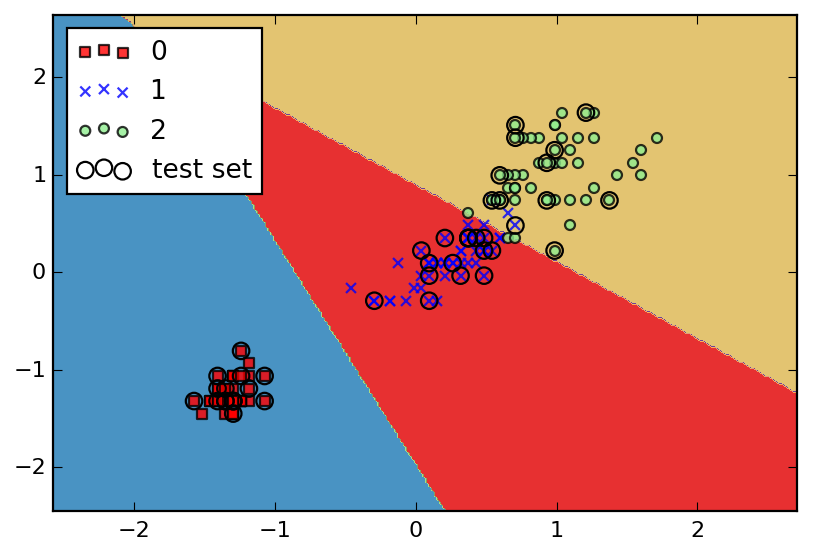

In [27]:
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
y_pred = np.argmax(lr.predict_proba(X_test_std), axis=1)
accuracy = accuracy_score(y_pred, y_test)
plot_decision_region(X_combined_std, y_combined, test_idx=test_idx, classifier=lr)
plt.legend(loc='upper left')

# SVM

Accuracy is 0.978


/Users/langechuanliu/.virtualenvs/cv/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


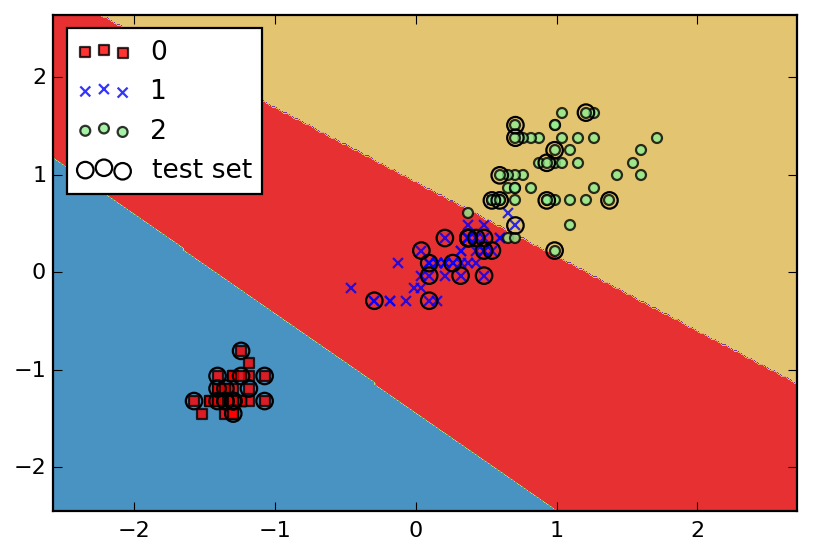

In [29]:
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy is {:.3f}'.format(accuracy))
plot_decision_region(X_combined_std, y_combined, test_idx=test_idx, classifier=svm)
plt.legend(loc='upper left')

# SGDClassifer

In [65]:
# SVM via SGDClassifier
svm = SGDClassifier(loss='hinge', n_iter=5, shuffle=True, random_state=0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy is {:.3f}'.format(accuracy))

# SVM via SGDClassifier
lr = SGDClassifier(loss='log', n_iter=5, shuffle=True, random_state=0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy is {:.3f}'.format(accuracy))

# Perceptron via SGDClassifier
ppn = SGDClassifier(loss='hinge', n_iter=5, shuffle=True, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy is {:.3f}'.format(accuracy))

Accuracy is 0.978
Accuracy is 0.978
Accuracy is 0.978


# Solving nonlinear proble with kernel SVM

In [31]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)


/Users/langechuanliu/.virtualenvs/cv/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


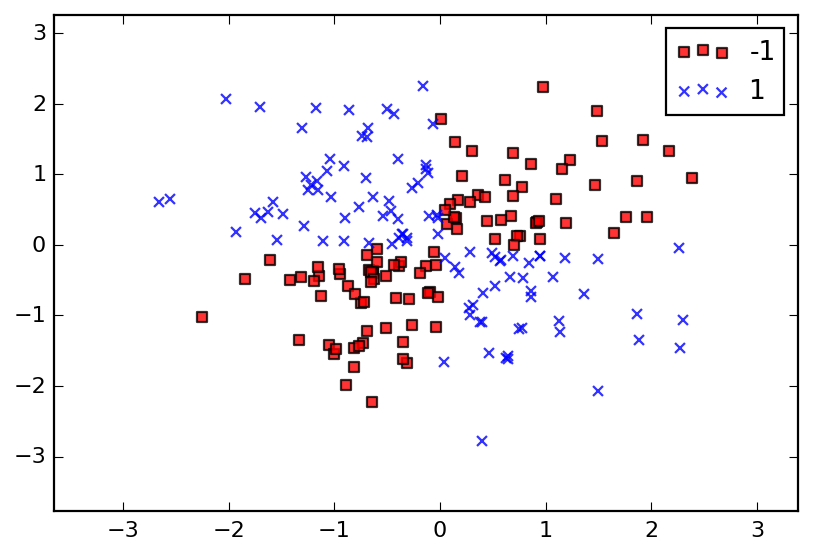

In [32]:
plot_decision_region(X_xor, y_xor)

### Influence of `gamma` and `C` parameters

- Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

- The C parameter trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.

Accuracy is 0.950


/Users/langechuanliu/.virtualenvs/cv/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


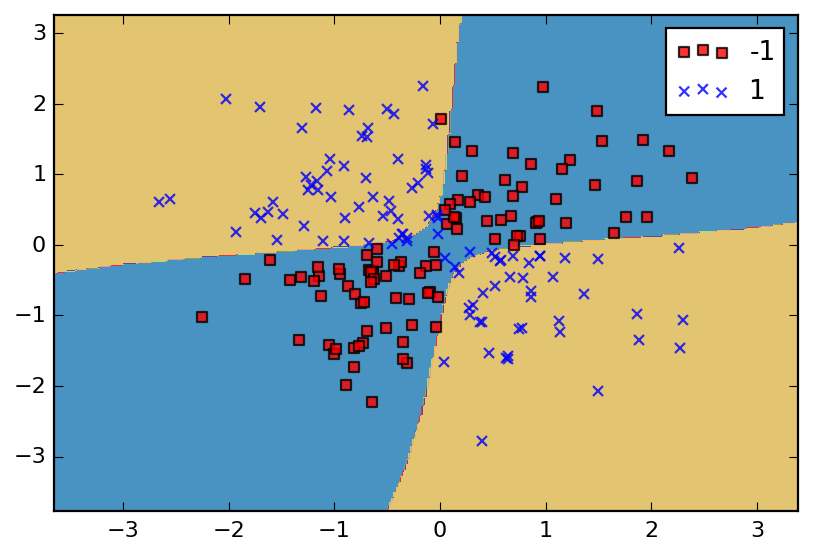

In [48]:
svm = SVC(kernel='rbf', C=10, gamma=0.1, random_state=0)
svm.fit(X_xor, y_xor)
y_pred = svm.predict(X_xor)
accuracy = accuracy_score(y_pred, y_xor)
print('Accuracy is {:.3f}'.format(accuracy))
plot_decision_region(X_xor, y_xor, classifier=svm)

Accuracy is 0.978


/Users/langechuanliu/.virtualenvs/cv/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


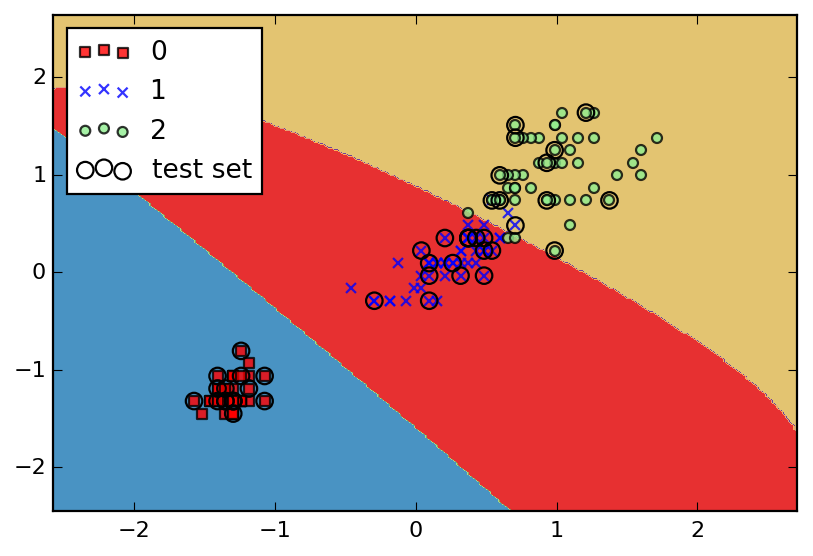

In [64]:
svm = SVC(kernel='rbf', C=1, gamma=0.2, random_state=0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy is {:.3f}'.format(accuracy))
plot_decision_region(X_combined_std, y_combined, classifier=svm, test_idx=test_idx)
plt.legend(loc='upper left')

Accuracy is 0.800


/Users/langechuanliu/.virtualenvs/cv/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


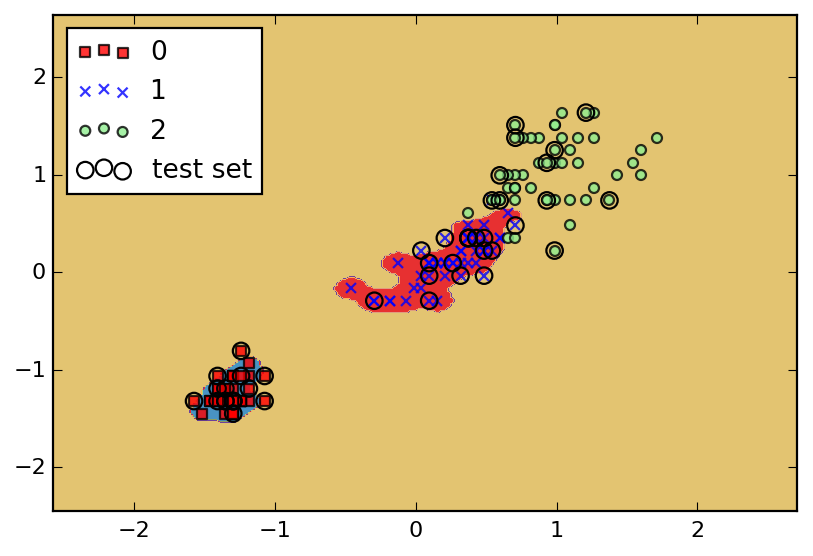

In [63]:
svm = SVC(kernel='rbf', C=1.0, gamma=100, random_state=0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy is {:.3f}'.format(accuracy))
plot_decision_region(X_combined_std, y_combined, classifier=svm, test_idx=test_idx)
plt.legend(loc='upper left')

# Decision tree
Decision tree is not susceptible to feature scaling

Accuracy is 0.978


/Users/langechuanliu/.virtualenvs/cv/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


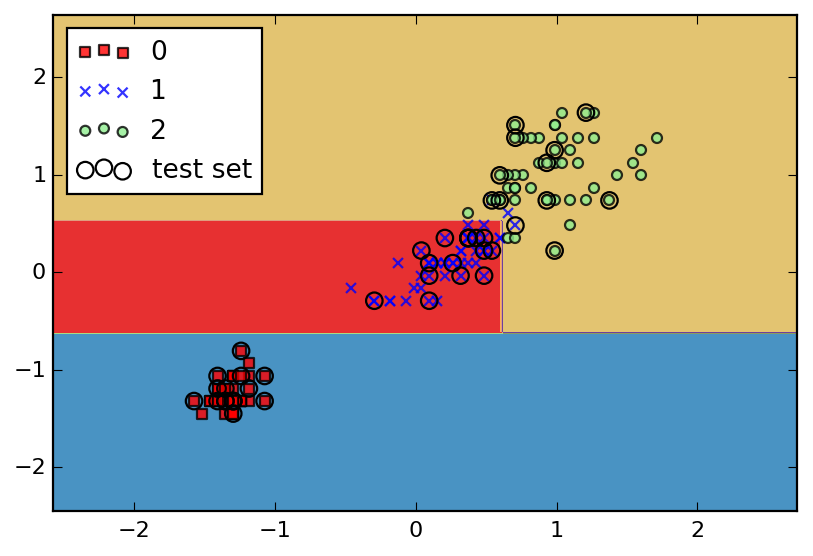

In [62]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train_std, y_train)
y_pred = tree.predict(X_test_std)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy is {:.3f}'.format(accuracy))
plot_decision_region(X_combined_std, y_combined, classifier=tree, test_idx=test_idx)
plt.legend(loc='upper left')

# Random Forest
1. Bootstrap $n$ (usually same as number of training samples) samples from training set with replacement
2. Grwo a decision tree from the bootstrap sample. At each node, randomly select $d$ (usually $\sqrt{m}$) from m features without replacemnet. Split the node using selected features to maximize information gain.
3. Repeat step 1 to 2 k times.
4. Aggregate prediction by each tree to assign the class label by majority vote.

Accuracy is 0.956


/Users/langechuanliu/.virtualenvs/cv/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


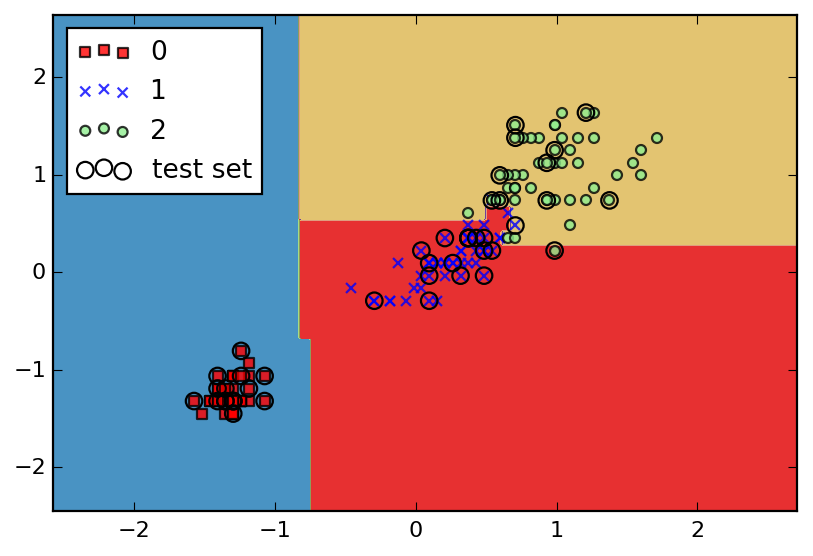

In [67]:
forest = RandomForestClassifier(criterion='entropy',
                               n_estimators=10,
                               random_state=1,
                               n_jobs=2)
forest.fit(X_train_std, y_train)
y_pred = forest.predict(X_test_std)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy is {:.3f}'.format(accuracy))
plot_decision_region(X_combined_std, y_combined, classifier=forest, test_idx=test_idx)
plt.legend(loc='upper left')

# K-Nearest Neighbor (KNN)
A lazy learner, and non-parametric one. The model needs to store training data at time of prediction. The complexity of the KNN model grows with the size of training data. Thus, storage space an become a challenge.

KNN model is sensitive to feature scaling, and assumes equal weight to each feature while calculating the distance.

KNN is also susceptible to the **curse of dimensionality**: even the closest neigbors beining too far away in a high-dimensional space to give a good estimate.

Accuracy is 1.000


/Users/langechuanliu/.virtualenvs/cv/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


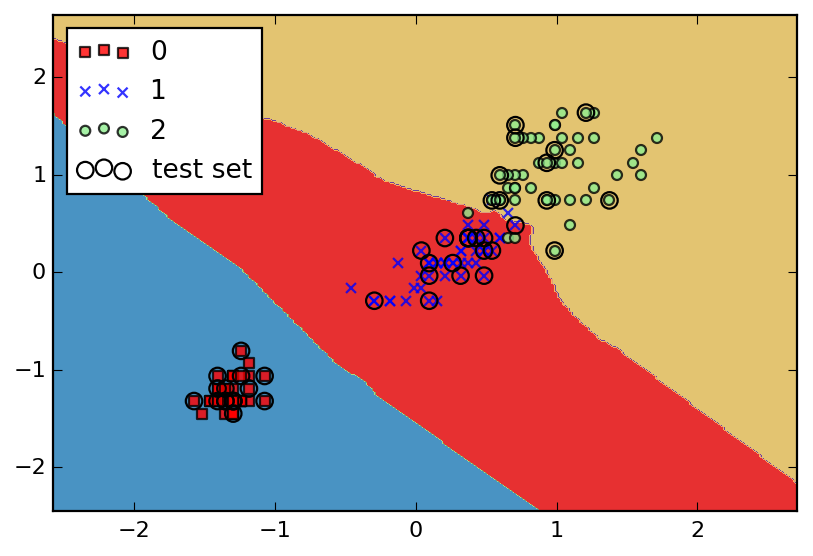

In [68]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy is {:.3f}'.format(accuracy))
plot_decision_region(X_combined_std, y_combined, classifier=knn, test_idx=test_idx)
plt.legend(loc='upper left')